#  <center> United States Medal of Honor Recipients
## <center> Exploration of Location, Time and Service Branch
### <center> By: Megan Williams  

The Congressional Medal of Honor is the highest award for valor for United States service members. It was established in 1861 by the U.S. Navy and then the following year by the U.S. Army. There are three versions of the medal based on the service branch; U.S. Army, U.S. Air Force, and U.S. Navy with the U.S. Marine Corps and U.S. Coast Guard receiving the Navy version. While traditionally awarded for combat related actions, during its early stages some recipients were awarded the medal for noncombat related activities. There is a difference between the year the Medal of Honor was awarded versus issued. Sometimes the medal can be issued several decades after the action for which they were recommended for the award.

This data visualization utilizes the dataset found on the CORGIS datasets page: https://think.cs.vt.edu/corgis/csv/medal_of_honor/medal_of_honor.html. It's source information is from the Congressional Medal of Honor Society. The dataset is missing some historical data due to poor record keeping in the 1800s and the dataset only goes to the year 2007 and a few awards have been made since then for actions in current and past conflicts.

In [3]:
import pandas as pd
import ipywidgets
import bqplot
import collections
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

In [8]:
MOH = pd.read_csv("https://willimemo.github.io/medal_of_honor.csv")

In [4]:
MOH_branch = MOH.groupby("organization")['awarded.date.year'].agg(np.size)

In [5]:
MOH_dict = MOH_branch.to_dict()

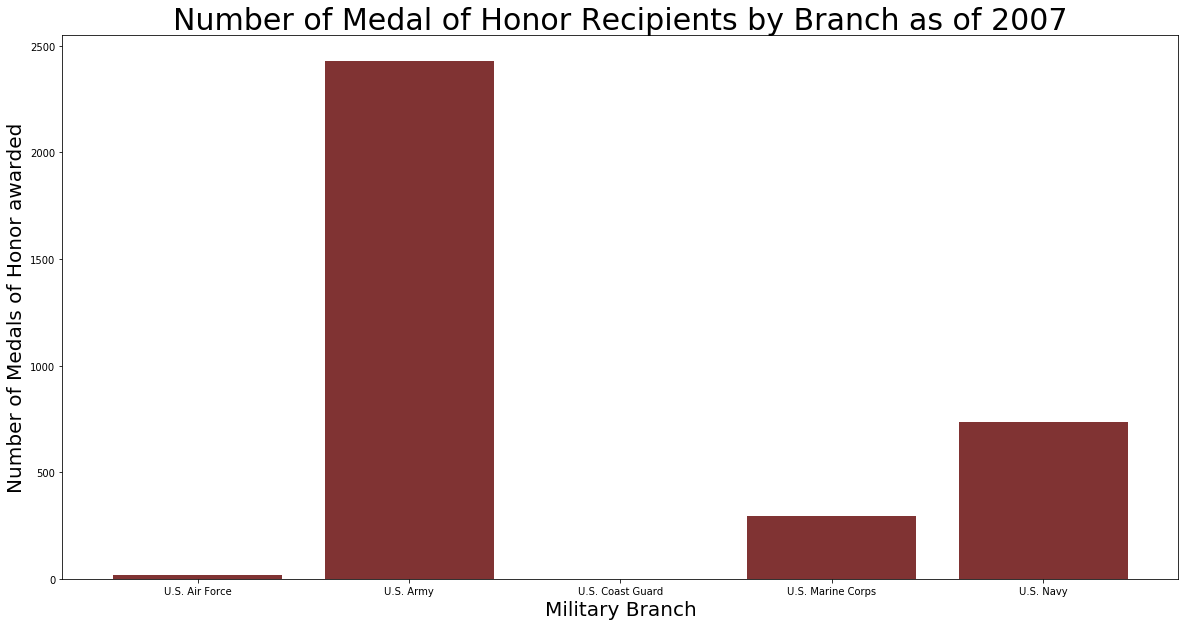

In [9]:
branch = list(MOH_dict.keys())
count = list(MOH_dict.values())
plt.figure(figsize=(20,10))
plt.xlabel("Military Branch", fontsize=20)
plt.ylabel("Number of Medals of Honor awarded", fontsize=20)
plt.bar(branch, count, color=(0.5, 0.2, 0.2, 1))


plt.title("Number of Medal of Honor Recipients by Branch as of 2007", loc='center', fontsize=30)
plt.show()

As you can see, the U.S. Army has the largest number of Medal of Honor recipients. Not only is it one of the older branches, it is also the largest branch. Aside from the U.S. Marine Corps, the Army is more likely to engage in combat due to its mission. The coast gu

In [10]:
MOH_years = list(MOH['awarded.date.year'])

In [11]:
num_per_year= collections.Counter(MOH_years)

In [12]:
sorted_years = collections.OrderedDict(sorted(num_per_year.items()))

In [13]:
sorted_years = collections.OrderedDict(sorted(num_per_year.items()))

In [14]:
sorted_years.pop(-1)

1270

In [15]:
sorted_years.pop(63)

1

In [16]:
sorted_years.pop(186)

1

In [17]:
sorted_years.pop(194)

1

In [19]:
test_tt = tt = bqplot.Tooltip(fields=['x', 'y'], 
                    labels=['Year', 
                            'Number of Recipients'])
x = list(sorted_years.keys())
y = list(sorted_years.values())


x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

x_ax = bqplot.Axis(scale = x_sc, label = 'Year')
y_ax = bqplot.Axis(scale = y_sc, label = 'Number of Medal of Honor Recipients', orientation = 'vertical')

scatter = bqplot.Scatter(x=x, y=y, scales={'x':x_sc, 'y':y_sc}, tooltip=test_tt)



fig = bqplot.Figure(marks=[scatter], axes=[x_ax,y_ax], title='Medal of Honor Recipients Awarded by Year')
fig.layout.min_width = '960px'
fig.layout.min_height = '640px'
display(fig)

Figure(axes=[Axis(label='Year', scale=LinearScale()), Axis(label='Number of Medal of Honor Recipients', orient…

Based off of this scatter plot, you can see how the number of Medals of Honor awarded correspond with significant conflicts in American history. The interaction of the plot will show the exact number of medals awarded per year. This scatter plot does exclude some of the data set due to the fact that some of the dataset was incomplete in the years column. 

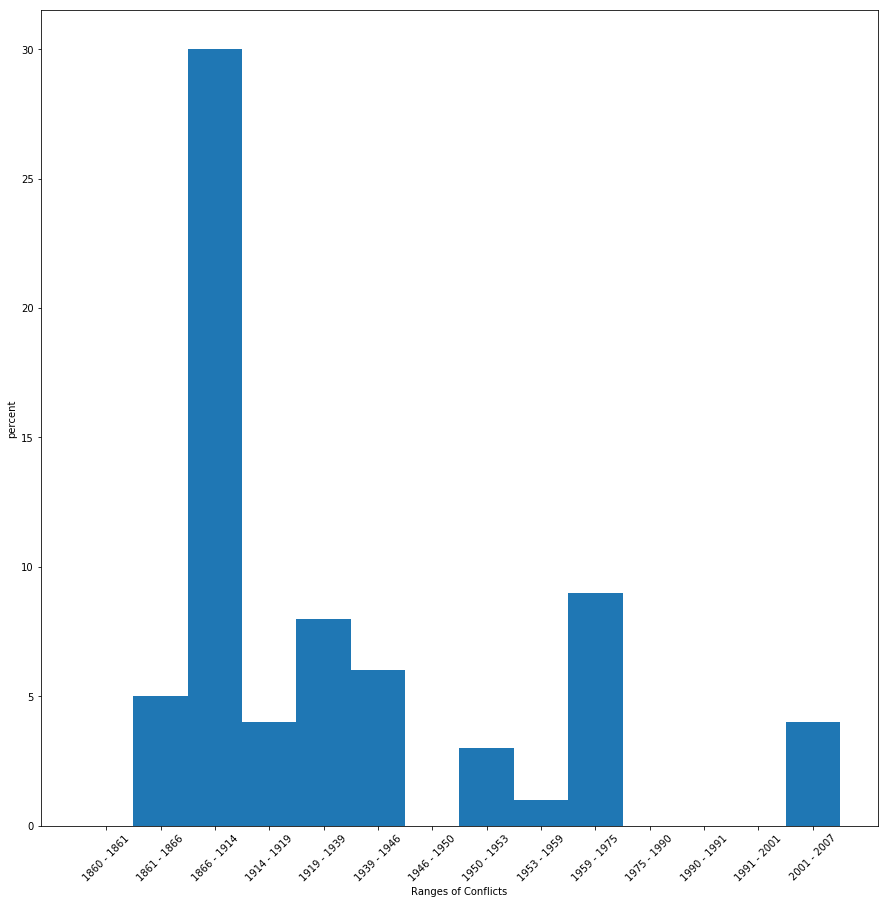

In [86]:

bins = [1860, 1861, 1866, 1914, 1919, 1939, 1946, 1950, 1953, 1959, 1975, 1990, 1991, 2001, 2007]

hist, bin_edges = np.histogram(x, bins) 

fig,ax = plt.subplots(figsize=(15,15))

ax.bar(range(len(hist)),hist,width=1) 

# Set the ticks to the middle of the bars
ax.set_xticks([i for i,j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i],bins[i+1]) for i,j in enumerate(hist)], rotation = 45)
plt.xlabel("Ranges of Conflicts")
plt.ylabel("percent")
plt.show()

In [57]:
army = MOH['organization'] == "U.S. Army"
air = MOH['organization'] == "U.S. Air Force"
marines= MOH['organization'] == "U.S. Marine Corps"
navy = MOH['organization'] == "U.S. Navy"
coast = MOH['organization'] == "U.S. Coast Guard"

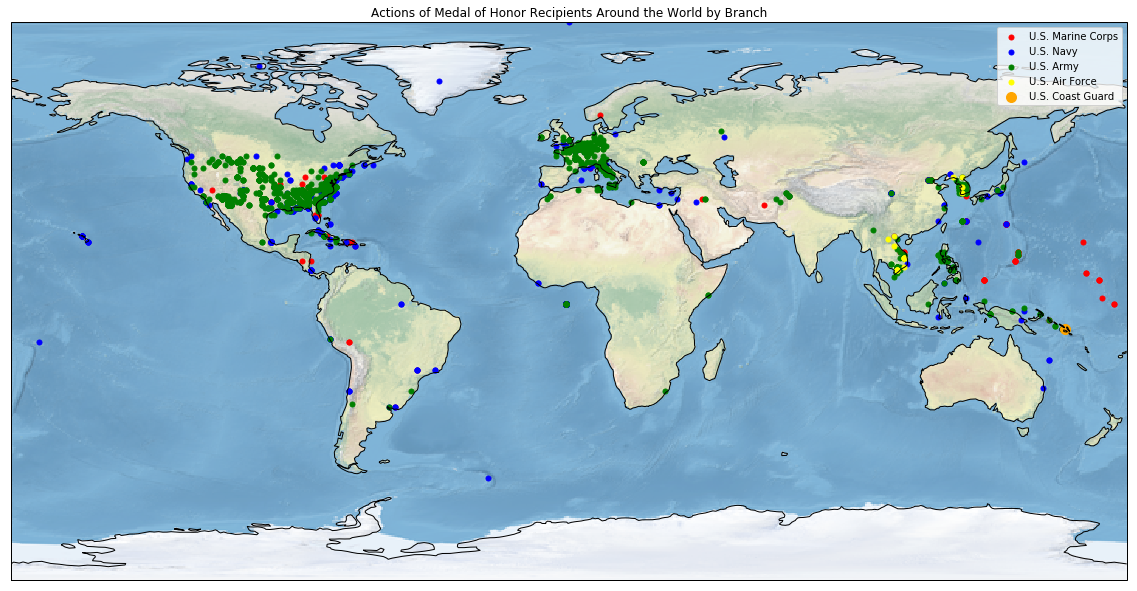

In [81]:

fig = plt.figure(figsize=(20, 20))

ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree(), title="Actions of Medal of Honor Recipients Around the World by Branch")
ax.scatter(MOH[marines]["longitude"], MOH[marines]["latitude"], s=25, color='red', label = "U.S. Marine Corps")
ax.scatter(MOH[navy]["longitude"], MOH[navy]["latitude"], s=25, color='blue', label = "U.S. Navy")
ax.scatter(MOH[army]["longitude"], MOH[army]["latitude"], s=25, color='green', label = "U.S. Army")
ax.scatter(MOH[air]["longitude"], MOH[air]["latitude"], s=25, color='yellow', label = "U.S. Air Force")
ax.scatter(MOH[coast]["longitude"], MOH[coast]["latitude"], s=100, color='orange', label = "U.S. Coast Guard")
ax.stock_img()
ax.legend()
ax.coastlines()

This plot shows where each military branch received each of it's awards. For the most part, each location corresponds to each branch's type of engagement. The Navy, Marine Corps and Coast Guard are mostly concentrated in the water, on islands and coastlines. The Army is concentrated mostly inland. The Medal of Honor recipients for the Air Force are concentrated mostly in Vietnam and Korea, which makes sense considering it was establised in 1947 and the Korean and Vietnam Wars consisted of a great deal of activity by the Air Force.

The large concentration of recipients in the United States would reflect actions during the Civil War and some of the interwar period before WWI. The actions in Europe would consist of mostly WWI and WWI. And the actions in the Pacific would be WWII, Korea and Vietnam. 

In [110]:
ages = list(np.array(MOH["awarded.date.year"]) - np.array(MOH["birth.date.year"]))


In [119]:

for age in ages[:]:
    #print (age)
    if age < 17:
        ages.remove(age)
    elif age > 60:
        ages.remove(age)
print(ages)


[28, 23, 27, 18, 23, 21, 33, 26, 45, 39, 44, 25, 26, 35, 22, 25, 21, 33, 28, 21, 36, 25, 36, 27, 30, 21, 21, 35, 24, 23, 22, 24, 25, 36, 38, 25, 21, 19, 42, 42, 21, 39, 36, 26, 30, 22, 20, 22, 28, 25, 24, 26, 22, 26, 27, 22, 20, 27, 23, 37, 23, 19, 27, 20, 26, 21, 22, 23, 23, 36, 23, 26, 19, 22, 25, 34, 23, 28, 25, 21, 21, 23, 25, 21, 30, 26, 28, 22, 25, 21, 22, 29, 23, 24, 31, 29, 22, 24, 18, 44, 20, 20, 29, 21, 35, 29, 23, 26, 23, 27, 30, 26, 22, 27, 29, 21, 32, 22, 31, 19, 19, 24, 21, 21, 21, 24, 36, 26, 27, 41, 24, 24, 29, 20, 39, 31, 21, 19, 22, 46, 23, 20, 23, 20, 17, 22, 32, 23, 21, 20, 23, 21, 27, 26, 35, 23, 22, 25, 29, 25, 28, 20, 32, 21, 22, 21, 30, 21, 36, 21, 23, 30, 22, 35, 43, 29, 28, 24, 21, 22, 29, 20, 26, 31, 31, 26, 30, 33, 24, 30, 39, 24, 19, 20, 40, 24, 20, 36, 30, 32, 21, 26, 45, 22, 22, 22, 28, 20, 22, 31, 28, 21, 47, 23, 28, 20, 32, 20, 21, 34, 21, 22, 39, 21, 22, 28, 22, 20, 23, 20, 42, 43, 26, 21, 23, 26, 23, 23, 20, 27, 19, 23, 24, 22, 29, 19, 33, 28, 19, 24,

In [142]:
from collections import Counter
age_dict =Counter(ages)


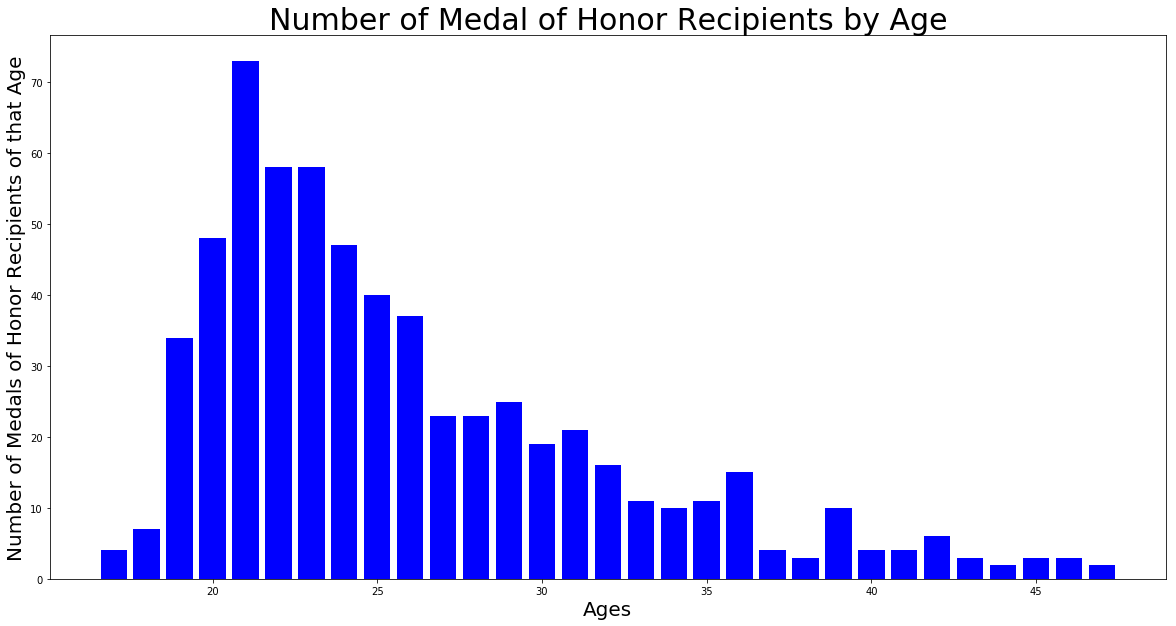

In [143]:
age_list = list(age_dict.keys())
counts = list(age_dict.values())
plt.figure(figsize=(20,10))
plt.xlabel("Ages", fontsize=20)
plt.ylabel("Number of Medals of Honor Recipients of that Age", fontsize=20)
plt.bar(age_list, counts, color='blue')


plt.title("Number of Medal of Honor Recipients by Age", loc='center', fontsize=30)
plt.show()

Due to poor historical record keeping this bar chart doesn't represent the full distribution of ages, but it reflective of service and combat. Generally the military consists of younger aged individuals. And, as you age you are more likely have have command roles that aren't as close to combat. 